In [20]:
from scipy import signal
from scipy.signal import kaiserord, lfilter, firwin, freqz

import librosa
import matplotlib.pyplot as plt

import numpy as np
from ipywidgets import  interactive,    Play,interact_manual,FloatSlider
from matplotlib.ticker import ( FormatStrFormatter )
from IPython.display import (
    Audio, display )
plt.rcParams['axes.grid'] = True
from frequency_waves import get_wave,nice_wave,square,triangle,circle,dirac
import frequency_waves
from Util import fold_and_dft, drop_every_kth, zero_padding, v_to_db ,decimate_in_k

In [2]:
%matplotlib notebook

In [6]:
fs = 44100
t = np.linspace(0,1,fs)
waves_dict = {
    'square':square(t,0,0.1,0.2)*20,
    'triangle':triangle(t,0,0.1,0.2)*20,
    'circle':circle(t,0,0.1,0.2)*20,
    'dirac':dirac(t,0,1/fs,0.2)
}

ax_freq = np.arange(0,2*np.pi,2*np.pi/fs)

<IPython.core.display.Javascript object>


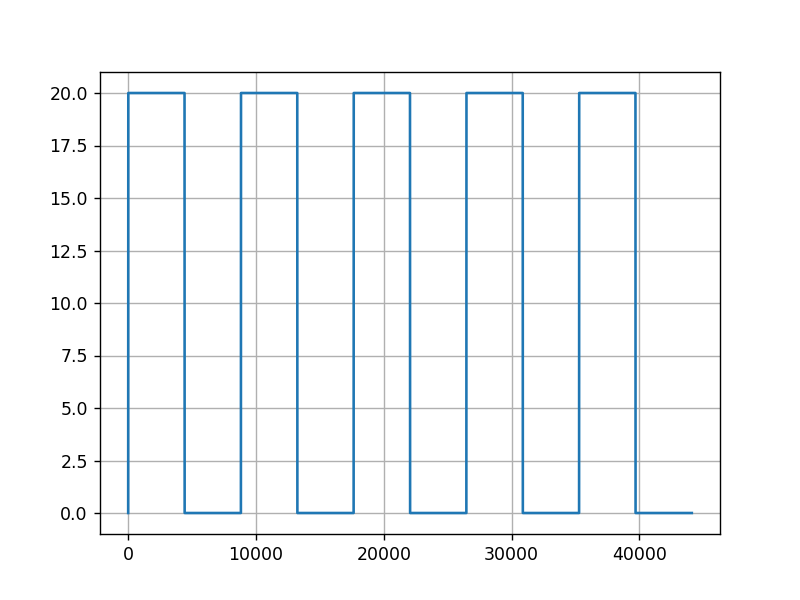

In [7]:
@interact_manual
def linearity(x1_name = waves_dict.keys(),x2_name = waves_dict.keys(),A=(0,50),B=(0,50)):
    fig,ax=plt.subplots(4)
    x1=waves_dict.get(x1_name)
    x2=waves_dict.get(x2_name)
    ax[0].plot(t,x1,t,x2)
    ax[1].plot(ax_freq,np.fft.fft(x1),ax_freq,np.fft.fft(x2))
    ax[2].plot(t,A*x1+B*x2)
    ax[3].plot(ax_freq,np.fft.fft(A*x1+B*x2))

interactive(children=(Dropdown(description='x1_name', options=('square', 'triangle', 'circle', 'dirac'), value…

In [11]:
@interact_manual
def convulotion(x1_name = waves_dict.keys(),x2_name = waves_dict.keys()):
    fig,ax=plt.subplots(4)
    x1=waves_dict.get(x1_name)
    x2=waves_dict.get(x2_name)
    conv = np.convolve(x1,x2,mode='same')
    ax[0].plot(t,x1,t,x2)
    ax[1].plot(ax_freq,np.fft.fft(x1),ax_freq,np.fft.fft(x2))
    ax[2].plot(t,conv)
    ax[3].plot(ax_freq,np.fft.fft(conv))

interactive(children=(Dropdown(description='x1_name', options=('square', 'triangle', 'circle', 'dirac'), value…

In [18]:
@interact_manual
def multipication(x1_name = waves_dict.keys(),x2_name = waves_dict.keys()):
    fig,ax=plt.subplots(4)
    x1=waves_dict.get(x1_name)
    x2=waves_dict.get(x2_name)
    mul = x1*x2
    ax[0].plot(t,x1,t,x2)
    ax[1].plot(ax_freq,np.fft.fft(x1),ax_freq,np.fft.fft(x2))
    ax[2].plot(t,mul)
    ax[3].plot(ax_freq,np.fft.fft(mul))

interactive(children=(Dropdown(description='x1_name', options=('square', 'triangle', 'circle', 'dirac'), value…

In [28]:


@interact_manual
def modulation(x1_name = waves_dict.keys(),fi=FloatSlider(min=0,max=np.pi,step = 0.001)):
    fig,ax=plt.subplots(4)
    x1=waves_dict.get(x1_name)
    mod = x1*np.exp(np.array([np.complex(0,fi*x)for x in t]))
    ax[0].plot(t,x1)
    ax[1].plot(ax_freq,np.fft.fft(x1))
    ax[2].plot(t,mod)
    ax[3].plot(ax_freq,np.fft.fft(mod))

interactive(children=(Dropdown(description='x1_name', options=('square', 'triangle', 'circle', 'dirac'), value…